In [1]:
from random import gauss
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')

import annualized_rv as arv

In [2]:
%matplotlib inline

In [3]:
aapl = yf.Ticker('AAPL')

In [4]:
history_aapl= aapl.history(period="10y")

In [5]:
history_aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-06-09 00:00:00-04:00,20.499106,20.760044,20.289029,20.720240,301660000,0.0,7.0
2014-06-10 00:00:00-04:00,20.948009,21.018771,20.691493,20.841864,251108000,0.0,0.0
2014-06-11 00:00:00-04:00,20.815323,20.954638,20.669375,20.755617,182724000,0.0,0.0
2014-06-12 00:00:00-04:00,20.795422,20.813113,20.322196,20.408438,218996000,0.0,0.0
2014-06-13 00:00:00-04:00,20.388534,20.441607,20.096637,20.185091,218100000,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-03 00:00:00-04:00,192.899994,194.990005,192.520004,194.029999,50080500,0.0,0.0
2024-06-04 00:00:00-04:00,194.639999,195.320007,193.029999,194.350006,47471400,0.0,0.0
2024-06-05 00:00:00-04:00,195.399994,196.899994,194.869995,195.869995,54156800,0.0,0.0


In [6]:
applePctChange = history_aapl['Close'].pct_change()

In [7]:
appleAnnualizedVol = arv.annualized_volatility(applePctChange,60)

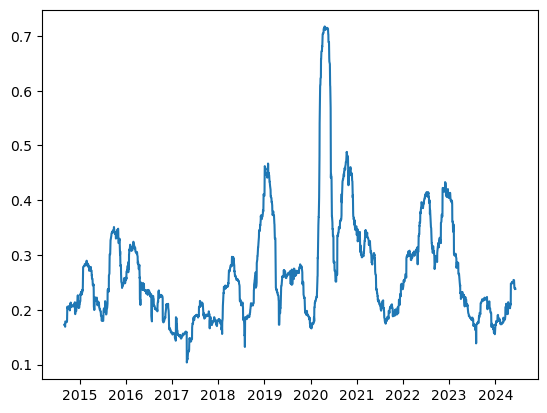

In [8]:
plt.plot(appleAnnualizedVol)

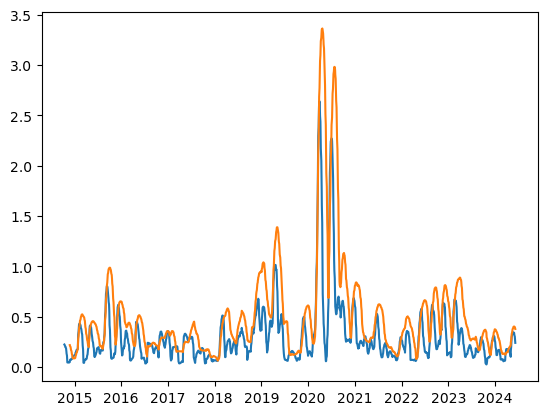

In [9]:
appleAnnualizedVol30 = arv.annualized_volatility(appleAnnualizedVol,30)
plt.plot(appleAnnualizedVol30)
appleAnnualizedVol60 = arv.annualized_volatility(appleAnnualizedVol,60)
plt.plot(appleAnnualizedVol60)

In [10]:
current_dir = os.getcwd()
pickle_path = os.path.join(current_dir, 'data')

average_iv = pd.read_pickle(os.path.join(pickle_path,'Fulldataframealphabet.pkl'))


In [11]:
average_iv

,date,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility
16,2017-01-03,808.438805,24,0.065753,0.008069,1,770.0,48.25,808.594202,0.952270,0.297314
17,2017-01-03,808.438805,24,0.065753,0.008069,1,772.5,46.55,808.594202,0.955362,0.298829
18,2017-01-03,808.438805,24,0.065753,0.008069,1,775.0,44.85,808.594202,0.958454,0.299744
19,2017-01-03,808.438805,24,0.065753,0.008069,1,777.5,43.35,808.594202,0.961545,0.302912
20,2017-01-03,808.438805,24,0.065753,0.008069,1,780.0,41.50,808.594202,0.964637,0.300613
...,...,...,...,...,...,...,...,...,...,...,...
725313,2021-12-31,2898.519708,35,0.095890,0.005325,-1,3015.0,160.45,2898.519708,1.040186,0.584162
725314,2021-12-31,2898.519708,35,0.095890,0.005325,-1,3020.0,163.15,2898.519708,1.041911,0.597091
725315,2021-12-31,2898.519708,35,0.095890,0.005325,-1,3025.0,167.90,2898.519708,1.043636,0.615762
725316,2021-12-31,2898.519708,35,0.095890,0.005325,-1,3030.0,171.20,2898.519708,1.045361,0.630323


In [12]:
appleAnnualizedVol30 = appleAnnualizedVol30['2017':'2021'].to_frame()


In [15]:
appleAnnualizedVol30.index.tz_convert(None)

DatetimeIndex(['2017-01-03 05:00:00', '2017-01-04 05:00:00',
               '2017-01-05 05:00:00', '2017-01-06 05:00:00',
               '2017-01-09 05:00:00', '2017-01-10 05:00:00',
               '2017-01-11 05:00:00', '2017-01-12 05:00:00',
               '2017-01-13 05:00:00', '2017-01-17 05:00:00',
               ...
               '2021-12-17 05:00:00', '2021-12-20 05:00:00',
               '2021-12-21 05:00:00', '2021-12-22 05:00:00',
               '2021-12-23 05:00:00', '2021-12-27 05:00:00',
               '2021-12-28 05:00:00', '2021-12-29 05:00:00',
               '2021-12-30 05:00:00', '2021-12-31 05:00:00'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [47]:
average_iv.rename(columns={'date':'Date'}, inplace = True)

In [51]:
average_iv.set_index('Date',inplace = True)


In [78]:
appleAnnualizedVol30

,level_0,index,Date,Close
0,0,0,2017-01-03 00:00:00-05:00,0.356386
1,1,1,2017-01-04 00:00:00-05:00,0.352581
2,2,2,2017-01-05 00:00:00-05:00,0.347257
3,3,3,2017-01-06 00:00:00-05:00,0.338423
4,4,4,2017-01-09 00:00:00-05:00,0.327112
...,...,...,...,...
1254,1254,1254,2021-12-27 00:00:00-05:00,0.297344
1255,1255,1255,2021-12-28 00:00:00-05:00,0.297086
1256,1256,1256,2021-12-29 00:00:00-05:00,0.289206
1257,1257,1257,2021-12-30 00:00:00-05:00,0.278448


In [72]:
appleAnnualizedVol30.Date = pd.to_datetime(appleAnnualizedVol30.Date)

In [74]:
pd.to_datetime(appleAnnualizedVol30.Date)

0      2017-01-03 00:00:00-05:00
1      2017-01-04 00:00:00-05:00
2      2017-01-05 00:00:00-05:00
3      2017-01-06 00:00:00-05:00
4      2017-01-09 00:00:00-05:00
                  ...           
1254   2021-12-27 00:00:00-05:00
1255   2021-12-28 00:00:00-05:00
1256   2021-12-29 00:00:00-05:00
1257   2021-12-30 00:00:00-05:00
1258   2021-12-31 00:00:00-05:00
Name: Date, Length: 1259, dtype: datetime64[ns, America/New_York]

In [76]:
pd.to_datetime(average_iv.date)

AttributeError: 'DataFrame' object has no attribute 'date'

In [77]:
average_iv

,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility
Date,,,,,,,,,,
2017-01-03,808.438805,24,0.065753,0.008069,1,770.0,48.25,808.594202,0.952270,0.297314
2017-01-03,808.438805,24,0.065753,0.008069,1,772.5,46.55,808.594202,0.955362,0.298829
2017-01-03,808.438805,24,0.065753,0.008069,1,775.0,44.85,808.594202,0.958454,0.299744
2017-01-03,808.438805,24,0.065753,0.008069,1,777.5,43.35,808.594202,0.961545,0.302912
2017-01-03,808.438805,24,0.065753,0.008069,1,780.0,41.50,808.594202,0.964637,0.300613
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2898.519708,35,0.095890,0.005325,-1,3015.0,160.45,2898.519708,1.040186,0.584162
2021-12-31,2898.519708,35,0.095890,0.005325,-1,3020.0,163.15,2898.519708,1.041911,0.597091
2021-12-31,2898.519708,35,0.095890,0.005325,-1,3025.0,167.90,2898.519708,1.043636,0.615762
